In [0]:
# importing libraries
import pandas as pd
import numpy as np


In [100]:
 #loading the dataset
 Auto = pd.read_csv('/content/Autolib_dataset (2).csv')
 Auto.head(10)
 
             

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


In [0]:
# getting to know our data type
Auto.dtypes
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [0]:
Auto.shape

(5000, 25)

In [0]:
                 # DATA CLEANING
                 # VALIDITY

In [0]:

Auto=Auto.drop(['Displayed comment','Scheduled at', 'Geo point', 'Public name'], axis=1)

In [0]:
#Viewing the column names to confirm the irrelevant columns have been dropped
#
Auto.columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City', 'ID',
       'Kind', 'Postal code', 'Rental status', 'Slots', 'Station type',
       'Status', 'Subscription status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

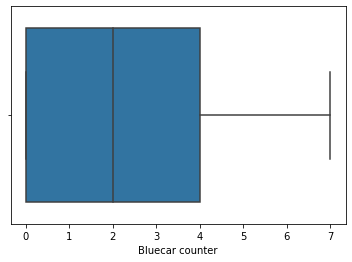

In [0]:
#checking for any outliers in the number of bluecars counted
#No outliers present thus nothing was done

import seaborn as sns

bplot = sns.boxplot(x=Auto['Bluecar counter'])

In [0]:
                           #UNIFORMITY
#change the column names to lower case
Auto.columns = Auto.columns.str.strip().str.lower().str.replace(' ','_')

In [0]:
# check columns to see the changes made
Auto.columns

Index(['address', 'cars', 'bluecar_counter', 'utilib_counter',
       'utilib_1.4_counter', 'charge_slots', 'charging_status', 'city', 'id',
       'kind', 'postal_code', 'rental_status', 'slots', 'station_type',
       'status', 'subscription_status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [0]:
# CHECKING FOR MISSING VALUES
Auto.isnull().sum()

address                0
cars                   0
bluecar_counter        0
utilib_counter         0
utilib_1.4_counter     0
charge_slots           0
charging_status        0
city                   0
id                     0
kind                   0
postal_code            0
rental_status          0
slots                  0
station_type           0
status                 0
subscription_status    0
year                   0
month                  0
day                    0
hour                   0
minute                 0
dtype: int64

In [0]:
                            # CONSISTENCY
#Checking for duplicated in the dataset
Auto.duplicated().sum()

0

In [0]:
Auto.head()

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,postal_code,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,operational,3,station,ok,nonexistent,2018,4,8,17,23


In [0]:
                      #EXPORTING THE CLEAN DATA
Auto.to_csv('Auto.csv')

In [0]:
                        ##DATA ANALYSIS
Auto_car = pd.read_csv('/content/Auto.csv')

In [0]:
#Creating new columns,in this,it shows that zero means nothing happenned that hour,while positive shows cars were returned in that hour while negative within the hour

Auto_car['blue_car'] = Auto_car['bluecar_counter'].diff()
Auto_car['utilib'] = Auto_car['utilib_counter'].diff()
Auto_car['utilib_1.4'] = Auto_car['utilib_1.4_counter'].diff()
Auto_car[['bluecar_counter','blue_car','utilib_counter','utilib','utilib_1.4_counter','utilib_1.4']]

,bluecar_counter,blue_car,utilib_counter,utilib,utilib_1.4_counter,utilib_1.4
0,0,NaN,0,NaN,0,NaN
1,6,6.0,0,0.0,0,0.0
2,3,-3.0,0,0.0,2,2.0
3,3,0.0,1,1.0,0,-2.0
4,3,0.0,0,-1.0,0,0.0
...,...,...,...,...,...,...
4995,2,2.0,0,0.0,0,0.0
4996,4,2.0,0,0.0,0,0.0
4997,1,-3.0,0,0.0,0,0.0
4998,2,1.0,0,0.0,0,0.0


In [0]:
                          PICKING UP BLUECAR

In [122]:
#Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.
popular_hr = Auto_car[(Auto_car.city == 'Paris')  & (Auto_car.blue_car < 0)].groupby(['hour'])['blue_car'].count()
popular_hr.sort_values(ascending = False).head(1)

hour
21    80
Name: blue_car, dtype: int64

In [112]:
#Popular station- Overall
#The line below computes the most popular station for picking up Bluecars 
#in Paris 
#
popular_station = Auto_car[(Auto_car.city == 'Paris') & (Auto_car.blue_car < 0) & (Auto_car.kind == 'STATION') & 
                       (Auto_car.status == 'ok')].groupby(['id'])['id'].count()
popular_station.sort_values(ascending = False).head(1)

id
paris-madame-18    7
Name: id, dtype: int64

In [92]:
#Postal code
#showing the postal code of the station obtained in the previous scenario
#
postal_code = Auto_car[(Auto_car.id == 'paris-madame-18') & (Auto_car.kind == 'STATION') & 
                       (Auto_car.blue_car < 0)].groupby(['postal_code'])['postal_code'].count()
postal_code.sort_values(ascending = False)

postal_code
75006    7
Name: postal_code, dtype: int64

In [106]:

#Popular station- Picking up hour
#The line below computes the most popular station for picking up Bluecars 
#in Paris during the most popular picking up hour
#
population_station2 = Auto_car[(Auto_car.city == 'Paris') & (Auto_car.blue_car < 0) & 
                        (Auto_car.kind == 'STATION') & (Auto_car.hour == 16) & 
                        (Auto_car.status == 'ok')].groupby(['id'])['id'].count()
population_station2.sort_values(ascending = False).head(1)

id
paris-bastille-20    2
Name: id, dtype: int64

In [0]:
                    RETURNING BLUECAR

In [123]:
            ## POPULAR HOUR FOR RETURNING BLUE CAR
popular_hr = Auto_car[(Auto_car.city == 'Paris')  & (Auto_car.blue_car > 0)].groupby(['hour'])['blue_car'].count()
popular_hr.sort_values(ascending = False).head(1)

hour
3    49
Name: blue_car, dtype: int64

In [114]:
#Popular station- Overall
#The line below computes the most popular station for returning Bluecars in paris

popular_station = Auto_car[(Auto_car.city == 'Paris') & (Auto_car.blue_car > 0) & (Auto_car.kind == 'STATION') & 
                       (Auto_car.status == 'ok')].groupby(['id'])['id'].count()
popular_station.sort_values(ascending = False).head(1)

id
paris-portedemontrouge-8    8
Name: id, dtype: int64

In [115]:
#Postal code
#showing the postal code of the station obtained in the previous scenario
#
postal_code = Auto_car[(Auto_car.id == 'paris-portedemontrouge-8') & (Auto_car.kind == 'STATION') & 
                       (Auto_car.blue_car > 0)].groupby(['postal_code'])['postal_code'].count()
postal_code.sort_values(ascending = False)

postal_code
75014    8
Name: postal_code, dtype: int64

In [116]:
#Popular station- Picking up hour
#The line below computes the most popular station for returning Bluecars 
#in Paris during the most popular picking up hour
#
population_station2 = Auto_car[(Auto_car.city == 'Paris') & (Auto_car.blue_car > 0) & 
                        (Auto_car.kind == 'STATION') & (Auto_car.hour == 16) & 
                        (Auto_car.status == 'ok')].groupby(['id'])['id'].count()
population_station2.sort_values(ascending = False).head(1)

id
paris-ordener-65    2
Name: id, dtype: int64

In [0]:
                     PICKING UP UTILIB

In [121]:
#Popular Hour 
#computing the most popular hour for picking up utilib cars in Paris
#
popular_hr = Auto_car[(Auto_car.city == 'Paris') & (Auto_car.utilib < 0)].groupby(['hour'])['utilib'].count()
popular_hr.sort_values(ascending = False).head(1)

hour
19    12
Name: utilib, dtype: int64

In [124]:
#Popular station- Overall
# most popular station for picking up UTILIB
#in Paris 
#
popular_station = Auto_car[(Auto_car.city == 'Paris') & (Auto_car.utilib < 0) & (Auto_car.kind == 'STATION') & 
                       (Auto_car.status == 'ok')].groupby(['id'])['id'].count()
popular_station.sort_values(ascending = False).head(1)

id
paris-legendre-22    2
Name: id, dtype: int64

In [125]:
#Postal code
#showing the postal code of the station obtained in the previous scenario
#
postal_code = Auto_car[(Auto_car.id == 'paris-legendre-22') & (Auto_car.kind == 'STATION') & 
                       (Auto_car.utilib < 0)].groupby(['postal_code'])['postal_code'].count()
postal_code.sort_values(ascending = False)

postal_code
75017    2
Name: postal_code, dtype: int64

In [0]:
                  RETURNING UTILIB


In [126]:
#Popular Hour 
#computing the most popular hour for returning utilib cars in Paris
#
popular_hr = Auto_car[(Auto_car.city == 'Paris') & (Auto_car.utilib > 0)].groupby(['hour'])['utilib'].count()
popular_hr.sort_values(ascending = False).head(1)

hour
6    12
Name: utilib, dtype: int64

In [127]:
#Popular station- Overall
# most popular station for returning UTILIB

popular_station = Auto_car[(Auto_car.city == 'Paris') & (Auto_car.utilib > 0) & (Auto_car.kind == 'STATION') & 
                       (Auto_car.status == 'ok')].groupby(['id'])['id'].count()
popular_station.sort_values(ascending = False).head(1)

id
paris-macmahon-5    4
Name: id, dtype: int64

In [128]:
#Postal code
#showing the postal code of the station obtained above
#
postal_code = Auto_car[(Auto_car.id == 'paris-macmahon-5') & (Auto_car.kind == 'STATION') & 
                       (Auto_car.utilib > 0)].groupby(['postal_code'])['postal_code'].count()
postal_code.sort_values(ascending = False)

postal_code
75017    4
Name: postal_code, dtype: int64

In [0]:
                 PICKING UP  UTILIB_1.4

In [130]:
#Popular Hour
#most popular hour for picking up utilib_1.4 cars in Paris
#
popular_hr = Auto_car[(Auto_car.city == 'Paris') & (Auto_car['utilib_1.4'] < 0)].groupby(['hour'])['utilib_1.4'].count()
popular_hr.sort_values(ascending = False).head(1)

hour
3    20
Name: utilib_1.4, dtype: int64

In [131]:
#Popular station- Overall
#The line below computes the most popular station for picking up utilib_1.4 cars 
#in Paris 
#
popular_station = Auto_car[(Auto_car.city == 'Paris') & (Auto_car['utilib_1.4'] < 0) & (Auto_car.kind == 'STATION') & 
                       (Auto_car.status == 'ok')].groupby(['id'])['id'].count()
popular_station.sort_values(ascending = False).head(1)

id
paris-richardlenoir-110    3
Name: id, dtype: int64

In [132]:
#Popular station- Picking up hour
#the most popular station for picking up utilib_1.4 cars 
#During the most popular picking up hour in paris
#
popular_station2 = Auto_car[(Auto_car.city == 'Paris') & (Auto_car['utilib_1.4'] < 0) & 
                        (Auto_car.kind == 'STATION') & (Auto_car.hour == 19) & 
                        (Auto_car.status == 'ok')].groupby(['id'])['id'].count()
popular_station2.sort_values(ascending = False).head(1)

id
paris-tolbiac-41    1
Name: id, dtype: int64

In [133]:
#Postal code
#showing the postal code of the station obtained above
#
postal_code = Auto_car[(Auto_car.id == 'paris-tolbiac-41') & (Auto_car.kind == 'STATION') & 
                       (Auto_car['utilib_1.4'] < 0)].groupby(['postal_code'])['postal_code'].count()
postal_code.sort_values(ascending = False).head(1)

postal_code
75013    1
Name: postal_code, dtype: int64

ERROR! Session/line number was not unique in database. History logging moved to new session 65


In [0]:
              RETURNING UTILIB_1.4

In [134]:

#most popular hour for returning utilib_1.4 cars in Paris
popular_hr = Auto_car[(Auto_car.city == 'Paris') & (Auto_car['utilib_1.4'] > 0)].groupby(['hour'])['utilib_1.4'].count()
popular_hr.sort_values(ascending = False).head(1)

hour
9    17
Name: utilib_1.4, dtype: int64

In [135]:
#Popular station- Overall
# most popular station for picking up utilib_1.4 cars in paris
popular_station = Auto_car[(Auto_car.city == 'Paris') & (Auto_car['utilib_1.4'] > 0) & (Auto_car.kind == 'STATION') & 
                       (Auto_car.status == 'ok')].groupby(['id'])['id'].count()
popular_station.sort_values(ascending = False).head(1)

id
paris-portedemontrouge-8    7
Name: id, dtype: int64

In [138]:
#Popular station- Picking up hour
#the most popular station for returning utilib_1.4 cars 
#During the most popular returning hour in paris
#
popular_station2 = Auto_car[(Auto_car.city == 'Paris') & (Auto_car['utilib_1.4'] > 0) & 
                        (Auto_car.kind == 'STATION') & (Auto_car.hour == 19) & 
                        (Auto_car.status == 'ok')].groupby(['id'])['id'].count()
popular_station2.sort_values(ascending = False).head(1)

id
paris-clichy-181    2
Name: id, dtype: int64

In [140]:
#Postal code
#showing the postal code of the station obtained above
#
postal_code = Auto_car[(Auto_car.id == 'paris-clichy-181') & (Auto_car.kind == 'STATION') & 
                       (Auto_car['utilib_1.4'] > 0)].groupby(['postal_code'])['postal_code'].count()
postal_code.sort_values(ascending = False).head(1)

postal_code
75017    3
Name: postal_code, dtype: int64